In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
import os

os.chdir("E:/EBAC/Material/M27 - K-means")

from sklearn.cluster import KMeans

dataset = pd.read_csv('iris.csv')
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
fields = dataset.iloc[:, [0,1,2,3]].values
print(fields)

wcss = []
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state=2)
    kmeans.fit(fields)

    wcss.append(kmeans.inertia_)
    

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Text(0, 0.5, 'WCSS')

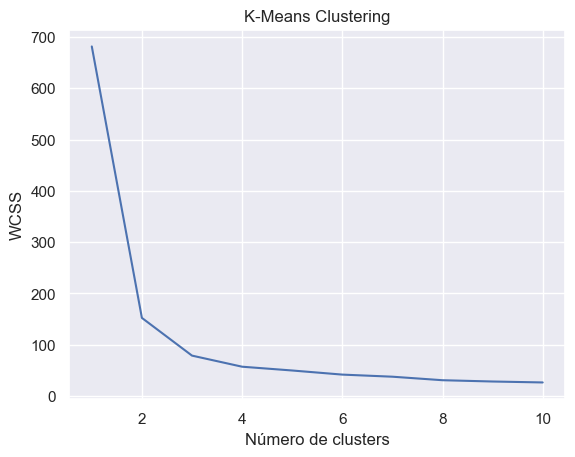

In [4]:
# Graficación del "Codo de Jambu"
sb.set()
mp.plot(range(1,11), wcss)
mp.title("K-Means Clustering")
mp.xlabel("Número de clusters")
mp.ylabel("WCSS") # Weighted Cluster sum of squares

In [13]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=42)
cluster_values = kmeans.fit_predict(fields)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


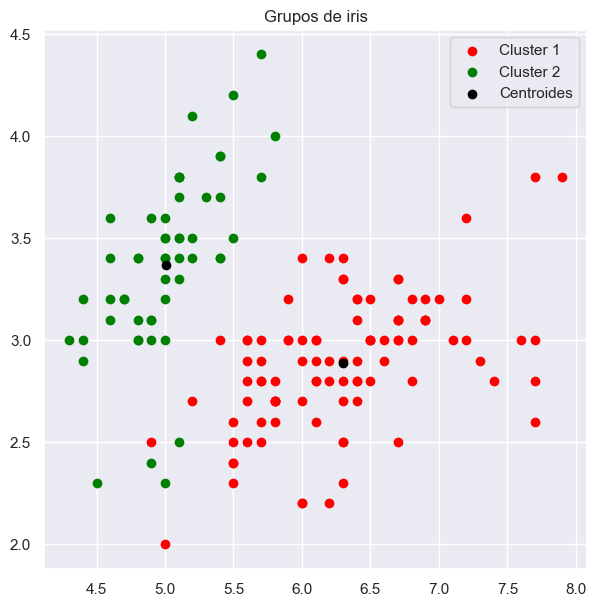

In [14]:
mp.figure(figsize=(7,7))
mp.scatter(fields[cluster_values==0,0], fields[cluster_values==0,1],c = 'red', label = "Cluster 1")
mp.scatter(fields[cluster_values==1,0], fields[cluster_values==1,1],c = 'green', label = "Cluster 2")

mp.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = 'black', label = 'Centroides')

mp.title("Grupos de iris")
mp.legend()
mp.show()

In [7]:
# Criterio de Silueta ("Silhouette")
from sklearn import datasets
from sklearn.metrics import silhouette_score

X = dataset.iloc[:,[0,1,2,3]].to_numpy()
for j in range(2,12):
    kmeans = KMeans(n_clusters = j, random_state = 42)
    kmeans.fit_predict(X)
    # Calculamos el Score de Silueta
    score = silhouette_score(X, kmeans.labels_,metric='euclidean')
    print("Score Silhouette: ", "k = ",j, ":", score)

Score Silhouette:  k =  2 : 0.6810461692117467
Score Silhouette:  k =  3 : 0.5511916046195925
Score Silhouette:  k =  4 : 0.4976433179321928
Score Silhouette:  k =  5 : 0.49308040671935277
Score Silhouette:  k =  6 : 0.36784649847122525
Score Silhouette:  k =  7 : 0.3542978877198858
Score Silhouette:  k =  8 : 0.3446797218056205
Score Silhouette:  k =  9 : 0.31558878533897866
Score Silhouette:  k =  10 : 0.30141437453251496
Score Silhouette:  k =  11 : 0.2687356216412032


In [8]:
# Bajo una transformación de PCA

fields2 = dataset.iloc[:,[0,1,2,3]].values

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(fields2)
fields2 = pca.transform(fields2)


In [9]:
wcss2 = []
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state=2)
    kmeans.fit(fields2)

    wcss2.append(kmeans.inertia_)

TypeError: 'str' object is not callable

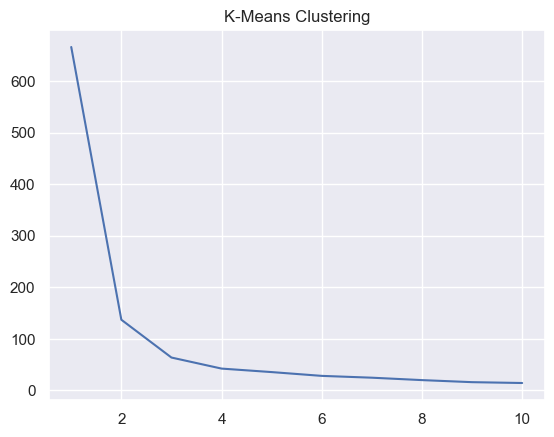

In [10]:
# Graficación del "Codo de Jambu"
sb.set()
mp.plot(range(1,11), wcss2)
mp.title("K-Means Clustering")
mp.xlabel("Número de clusters")
mp.ylabel("WCSS") # Weighted Cluster sum of squares
mp.show()

In [17]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=42)
cluster_values = kmeans.fit_predict(fields2)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


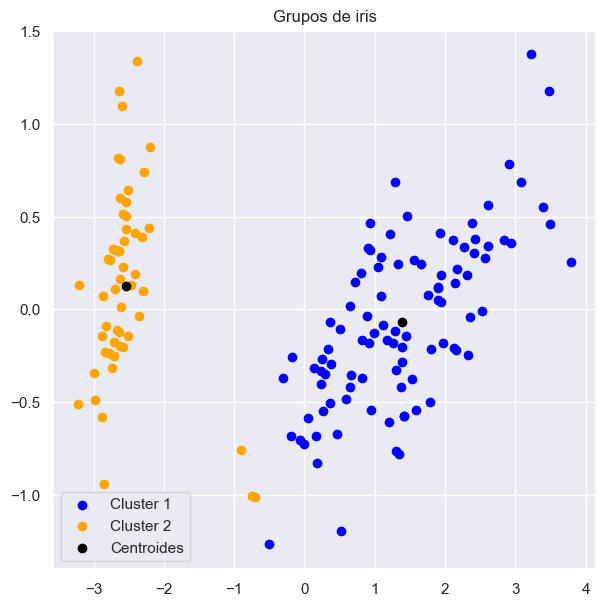

In [19]:
mp.figure(figsize=(7,7))
mp.scatter(fields2[cluster_values==0,0], fields2[cluster_values==0,1],c = 'blue', label = "Cluster 1")
mp.scatter(fields2[cluster_values==1,0], fields2[cluster_values==1,1],c = 'orange', label = "Cluster 2")

mp.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = 'black', label = 'Centroides')

mp.title("Grupos de iris")
mp.xlabel = "Annual income"
mp.ylabel = "Spending Score"
mp.legend()
mp.show()